In [7]:
import numpy as np
X = np.array([[0,1,2,3],[10,11,12,13],[20,21,22,23],[30,31,32,33]])
#X 是一个二维数组，维度为 0 ，1；第 0 层 [] 表示第 0 维；第 1 层 [] 表示第 1 维；

# X[n0,n1] 表示第 0 维 取第n0 个元素 ，第 1 维取第 n1 个元素
print(X[1,0])
# X[1:3,1:3] 表示第 0 维 取 (1:3)元素 ，第 1 维取第(1:3) 个元素
print(X[1:3,1:3])

# X[:n0,:n1] 表示第 0 维 取 第0 到 第n0 个元素 ，第 1 维取 第0 到 第n1 个元素
print(X[:2,:2])
# X[:,:n1] 表示第 0 维 取 全部元素 ，第 1 维取 第0 到第n1 个元素
print(X[:,:2])

# X[:,0]) 表示第 0 维 取全部 元素 ，第 1 维取第 0 个元素
print(X[:,0])


10
[[11 12]
 [21 22]]
[[ 0  1]
 [10 11]]
[[ 0  1]
 [10 11]
 [20 21]
 [30 31]]
[ 0 10 20 30]


checkpoint directory created: ./model
saving model version 0.0


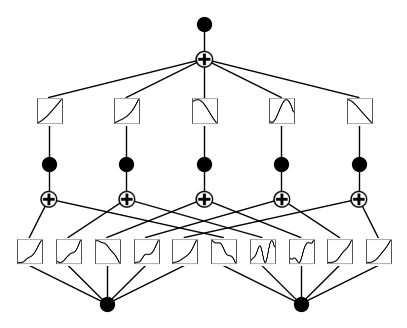

In [8]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [9]:
dataset

{'train_input': tensor([[-0.0075,  0.5547],
         [ 0.5364,  0.1791],
         [-0.8230,  0.1526],
         ...,
         [-0.3216, -0.4567],
         [ 0.0036, -0.3966],
         [-0.1923, -0.8376]]),
 'test_input': tensor([[-0.0850, -0.2418],
         [-0.7799, -0.0967],
         [-0.0061, -0.4609],
         ...,
         [ 0.0392, -0.2945],
         [-0.3037, -0.0922],
         [ 0.7534,  0.8848]]),
 'train_label': tensor([[1.3287],
         [2.7886],
         [0.6038],
         [0.6248],
         [0.5784],
         [2.4956],
         [0.9510],
         [2.2221],
         [0.9604],
         [5.0185],
         [0.7090],
         [0.6934],
         [1.4567],
         [0.4631],
         [0.6223],
         [1.1396],
         [2.6025],
         [3.8784],
         [0.7173],
         [0.5919],
         [5.1320],
         [2.4276],
         [0.5478],
         [2.5004],
         [0.6470],
         [1.3875],
         [2.6785],
         [0.9634],
         [0.4302],
         [0.7583],
      

In [10]:
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [17]:
dataset["test_label"].shape


torch.Size([20, 1])

In [11]:
# train the model
res =model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10)
train_loss=res["train_loss"] 
test_loss=res["test_loss"]  

| train_loss: 3.95e-02 | test_loss: 3.92e-02 | reg: 2.25e+01 | : 100%|█| 20/20 [00:09<00:00,  2.15it

saving model version 0.1


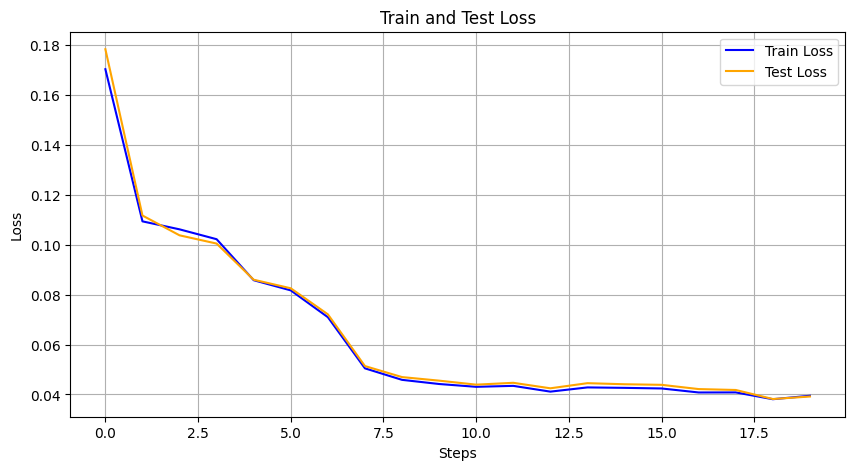

In [12]:
# 绘制损失图
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(test_loss, label='Test Loss', color='orange')
plt.title('Train and Test Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

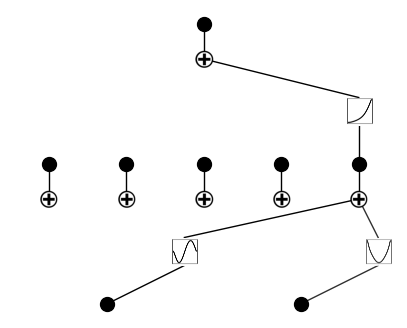

In [13]:
model.plot()

In [14]:
import torch
from kan.utils import create_dataset_from_data
print(torch.__version__)

2.2.2+cpu


In [15]:
x = torch.rand(100,2)
y = torch.rand(100,1)
dataset = create_dataset_from_data(x, y)

In [16]:
dataset

{'train_input': tensor([[0.7745, 0.4369],
         [0.0223, 0.1689],
         [0.5139, 0.4569],
         [0.8352, 0.2056],
         [0.5932, 0.1123],
         [0.3936, 0.6069],
         [0.1852, 0.3734],
         [0.3798, 0.3948],
         [0.3748, 0.2564],
         [0.8198, 0.9971],
         [0.2515, 0.1168],
         [0.3051, 0.9320],
         [0.1100, 0.2121],
         [0.4218, 0.5065],
         [0.0508, 0.2630],
         [0.8998, 0.0960],
         [0.2020, 0.4891],
         [0.5191, 0.6159],
         [0.2560, 0.7366],
         [0.4194, 0.5529],
         [0.2729, 0.6883],
         [0.5936, 0.4158],
         [0.9527, 0.0362],
         [0.5730, 0.6186],
         [0.1475, 0.2248],
         [0.7403, 0.6766],
         [0.7703, 0.0178],
         [0.5846, 0.0332],
         [0.4725, 0.5751],
         [0.0051, 0.1757],
         [0.0321, 0.0780],
         [0.3074, 0.6341],
         [0.1957, 0.9537],
         [0.0488, 0.8163],
         [0.6012, 0.8179],
         [0.8970, 0.8421],
         [0.3